## Basics of cluster analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv('country_cluster.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

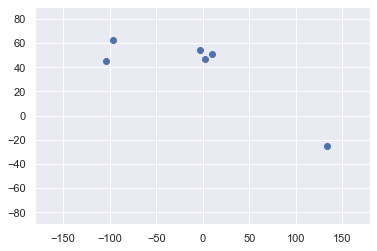

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [5]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [6]:
kmeans = KMeans(2)

In [7]:
kmeans.fit(x)


KMeans(n_clusters=2)

## Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

## the first 5 obs are in cluster 0 while the last one is in cluster 1

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


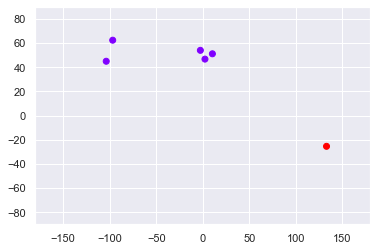

In [13]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Clustering with the categorical data i.e lang

## Map the data


In [14]:
data_mapped = data.copy()

In [15]:
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})

In [16]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## select the feature

## we can even use single featurem3

In [22]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [27]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## CLustering results

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [29]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


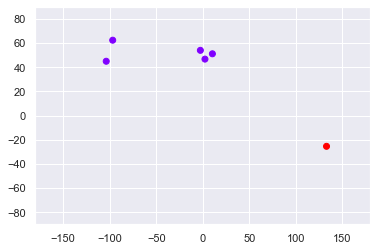

In [30]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## selecting the number of clusters

## WCSS

In [31]:
kmeans.inertia_

13208.958119999996

In [32]:
wcss=[]
for i in range (1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [33]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'WCSS')

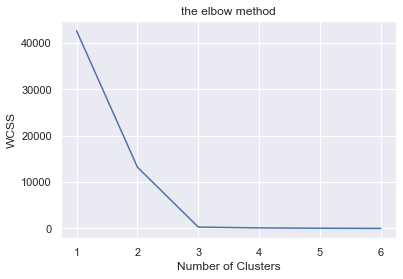

In [34]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## either 2 or 3 number cluster is ok 
## 3 is better cos further there is no progress
## 2 is not preferrable that much cos 2-3 there is big drop

## Market Segmentation example